# Gráfico Animado % CPU
**Nesse notebook vamos criar um gráfico que dispõe em tempo real a porcentagem de uso da CPU utilizando duas bibliotecas.**

Documentação:
- Matplolib -> https://matplotlib.org/stable/index.html
- Psutil -> https://psutil.readthedocs.io/en/latest/

### Antes de Começar:
- **%matplotlib notebook** usamos esse comando para permitir que façamos interações coma s Figuras criadas(Zoom, Resize etc). Após executado, ele é válido para todas as outras células do notebook.

In [55]:
%matplotlib notebook

## 1.0 - Importações que Vamos Precisar:

In [130]:
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.artist import Artist
from psutil import cpu_percent

## 1.1 - cpu_percent()
- A função cpu_percent() nos retorna a procentagem de uso da CPU toda vez que é chamada.

In [131]:
cpu_percent()

47.1

## 2.0 - Criando a Figura e os Eixos:

<IPython.core.display.Javascript object>


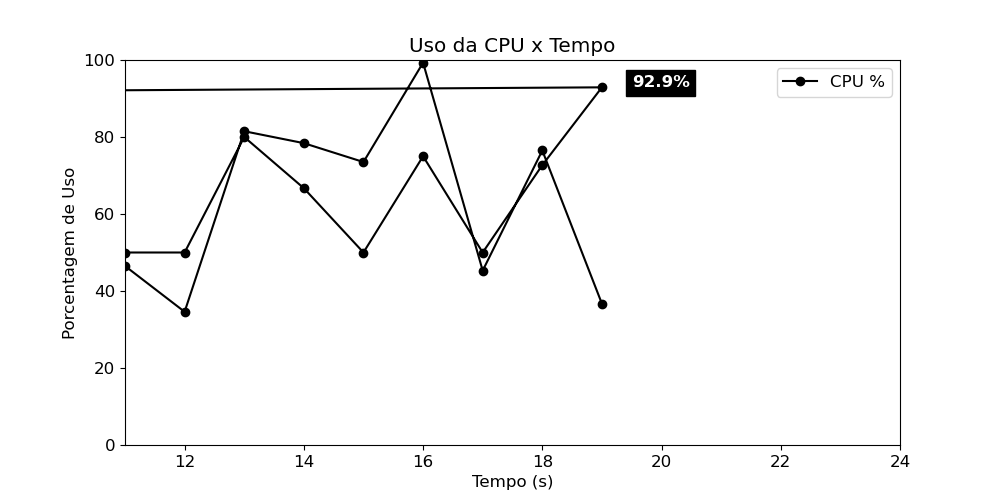

In [132]:
x, y = [], [] # eixos
fig, ax = plt.subplots(figsize=(10,5)) # figura com tamanho 10x6
line, = ax.plot(y, label='CPU %', color ='k', marker='o') # linha que será atualizada

## 2.1 - Adicionando Informações:
- **Com a figura e os eixos criados precisamos passar algumas informações para melhorar o entendimento do gráfico como:**
    1. Legendas;
    2. Limites dos eixos x e y;
    3. Tamanho da fonte dos textos;
    4. Título.

In [133]:
ax.set(xlim=(0,10), ylim=(0,100)) # Limites dos eixos
ax.set_xlabel('Tempo (s)', fontsize='medium')
ax.set_ylabel('Porcentagem de Uso', fontsize='medium')
ax.set_title('Uso da CPU x Tempo', fontsize='large')
ax.legend()

plt.rcParams.update({'font.size': 12})

## 3.0 Init Function:
A função a seguir será chamada uma única vez pela FuncAnimation() no inicio. Aproveitei para setar os valores que serão passados para linha e atualizados constatemente. Também estou personalizando a cor da linha e um marcador.

In [134]:
def init():
    # Setando valores da linha
    line.set_data([],[]) 
    
    # Agora vou fazer algumas personalizações
    line.set_color('k')
    line.set_marker('o')

    return line,

## 3.1 Animate Function:
A função a seguir será chamada repetidas vezes pela FuncAnimation() para efetivamente gerar a animação na nossa figura criada acima. Portanto, é necessário atualizar os valores da linha e "seta-los" novamente.

**Adicional:** 
- Decidi incluir um texto com a procentagem ao lado da cordenada **x,y** que estiver sendo marcada no gráfico. 
- Também é importante movimentar o eixo **x** para que consigamos acompanhar as atualizações. Não existe necessidade de usar os mesmos valores que usei (8 e 5). Apenas achei visualmente confortável e assistir se a movimentação começar a partir de **i>8** execução, com eixo **x** 8 casas para trás no limite esquerdo e 5 casas para frente no limite direito

In [135]:
def animate(i):
    #Atualizando Dados
    x.append(i)
    y.append(cpu_percent()) 
    
    # Desenhando a Linha
    line.set_data(x, y)

    # Limpando o texto de porcentagem anterior.
    for txt in ax.texts:
        Artist.remove(txt)
        
    # Posicionando a porcentagem ao lado da cordenada x,y.
    texto = ax.text(x[i], y[i], 
        '{}%'.format(y[i]), 
        position=(x[i]+0.5, y[i]),
        fontweight=600,
        color='white',
        backgroundcolor='black')

    # Movimentando eixo x
    if i > 8:
        ax.set_xlim(i-8, i+5)
        
    return line,

## 4.0 FuncAnimation()
Aqui finalmente chamamos a FuncAnimation e passamos a figura, a função que será chamada repetidas vezes para animar a figura, o número de frames/execuções, o intervalo entre cada uma delas(1 segundo) etc..

Para conhecer melhor os parametros passados, você pode consultar a documentação aqui: 
- FuncAnimation -> https://matplotlib.org/stable/api/_as_gen/matplotlib.animation.FuncAnimation.html?highlight=funcanimation#matplotlib.animation.FuncAnimation

In [136]:
animation = FuncAnimation(fig, animate, frames=20, interval=1000, blit=True, init_func=init)

## 5.0 Resultados
Com todas as etapas anteriores feitas, basta usar o método show() para exibir os resultados.
Execute a célula a seguir e suba a tela e volta a Figura que criamos para visualizar o gráfico funcionando

In [69]:
plt.show() # Os resultados são exibidos na Figura 1 disposta no ínicio.